In [1]:
import matplotlib
import matplotlib.image as image
import matplotlib.pyplot as plt

import numpy as np

import scipy.signal
def abshilbert(x,**kwargs):
    return np.abs(scipy.signal.hilbert(x,**kwargs))

In [162]:
%matplotlib notebook

In [297]:
#Make some fake data with three dominant frequencies and some random noise

Ns = 400 
dt = 0.2e-7
Fs = 1/dt #sampling frequncy

freqs=[2e5, 1e6, 2e6, 3e6]
amps =[0.5, 0.25, 0.25, .25]

times = np.linspace(0,1.0,Ns)*Ns*dt
signal = np.zeros(Ns)

for i in range(len(freqs)):
    band_noise = (1.0 + np.random.normal(size=Ns,scale=0.001))
    signal += band_noise*amps[i]*np.sin(times*2*np.pi*freqs[i])

# add uniform random noise
signal += 0.05*(np.random.ranf(size=Ns)-0.5)

<IPython.core.display.Javascript object>


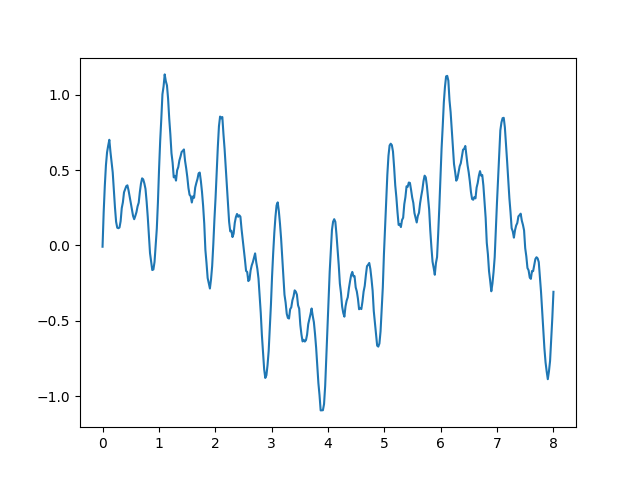

In [298]:
plt.plot(times*1e6,signal)

In [299]:
#Make frequency spectrum

#Find next power of 2 since discrete Fourier Transform works best with 0-padded data of length power of 2.
NFFT = int(2**(np.ceil(np.log2(Ns))))
fx = np.linspace(0.0, 1.0, NFFT)*Fs

signaltFT = np.fft.fft(signal,n=NFFT) #signalFT is a complex number with real and imaginary parts

<IPython.core.display.Javascript object>


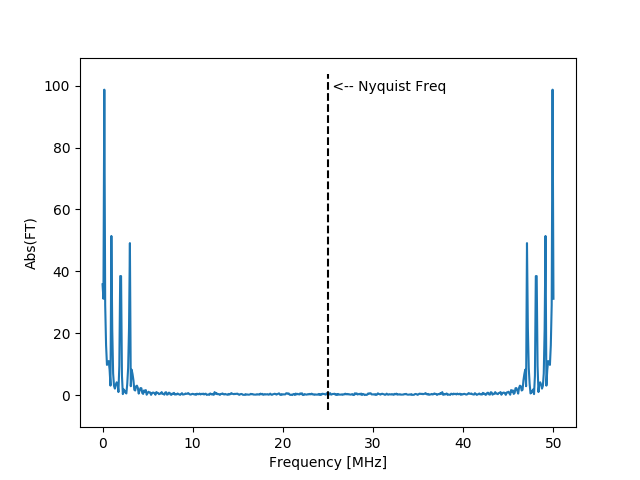

In [300]:
#plot the magnitude of the signalFT. 

#Notice how the data wraps around. 
#This is a result of zero-padding the input and is a good thing. It prevents
#aliasing in the final filtered signal
plt.plot( fx*1e-6, np.abs(signaltFT))
plt.xlabel('Frequency [MHz]')
plt.ylabel('Abs(FT)')

plt.plot(Fs*1e-6/2.0*np.ones(2), plt.ylim(), 'k--')

plt.text(Fs*1e-6/2.0, plt.ylim()[1]*0.9, " <-- Nyquist Freq")

<IPython.core.display.Javascript object>


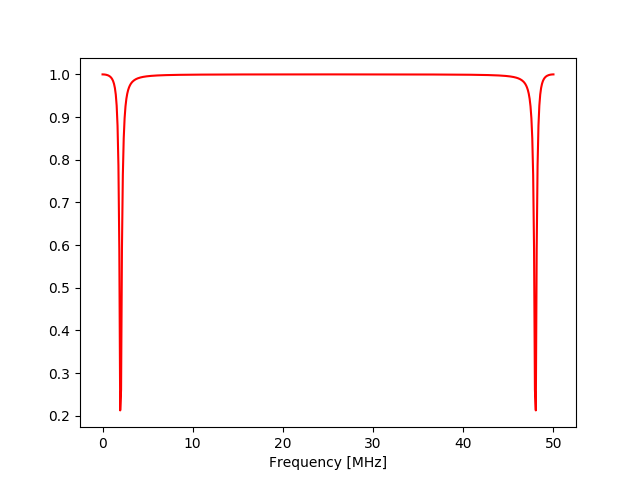

In [301]:
# Create notch filter to remove the middle frequency

fr = freqs[2]  # Frequency to be removed from signal (Hz)
Q = 5.0  # Quality factor. Q = fr / bandwith of filter (-3dB). This controls filter width

w0 = fr/(0.5*Fs)  # Normalized Frequency. This is the convention needed by the scipy function below

# Design a DIGITAL notch filter using builtin function
b, a = scipy.signal.iirnotch(w0, Q)
#Compute frequency response
w, response = scipy.signal.freqz(b,a, worN = fx*2*np.pi/Fs)

fwx = w*Fs/(2*np.pi)
#plot filter
#plt.plot(fx*1e-6,  np.abs(signaltFT),'b' )
plt.plot(fx*1e-6,  np.abs(response),'r' )
plt.xlabel('Frequency [MHz]')

<IPython.core.display.Javascript object>


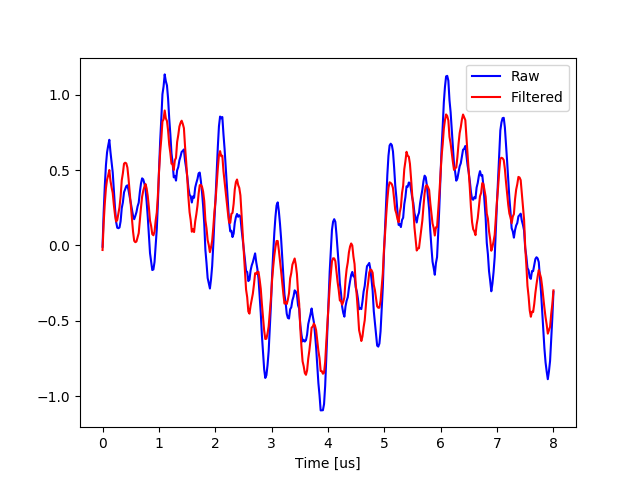

In [302]:
#Apply the filter
filtered_signal = scipy.signal.filtfilt(b,a,signal)

#Plot
plt.plot(times*1e6,signal,'b',label='Raw')
plt.plot(times*1e6,filtered_signal,'r',label='Filtered')
plt.xlabel('Time [us]')
plt.legend()